In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Font modification
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18

# Data loading and assembly

In [6]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID'] 
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0.0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0.0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0.0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0.0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1.0,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


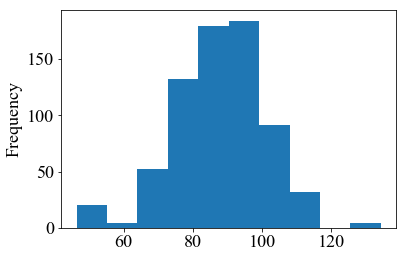

In [7]:
spectra['target'].plot.hist()
plt.savefig('Target histogram - no cleaning.png', bbox_inches='tight')
plt.show()

In [8]:
# dataset shape
spectra.shape

(698, 293)

In [9]:
spectra['target'].skew()


-0.3542939246986611

# Dataset clean ?

In [10]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,87.867001,88.361032,35.075930,34.089405,33.118207,32.248728,31.512126,30.961026,30.527884,30.184520,...,0.642378,0.717119,0.779950,0.821864,0.881985,0.945085,1.006667,1.069775,1.134070,1.199629
std,13.327779,51.000422,2.030035,2.060834,2.089150,2.111065,2.129829,2.145836,2.150767,2.153461,...,0.686442,0.693758,0.699668,0.704813,0.711064,0.717485,0.724458,0.731790,0.738503,0.745828
min,46.333333,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,80.000000,44.250000,34.081783,33.112638,32.129796,31.271699,30.559600,30.006750,29.585270,29.244950,...,0.238126,0.316725,0.373221,0.403003,0.462925,0.522936,0.587332,0.652647,0.715998,0.776902
50%,88.000000,88.000000,35.383537,34.404322,33.446087,32.584858,31.861850,31.307280,30.874285,30.531601,...,0.632675,0.710483,0.777476,0.820467,0.884216,0.946825,1.012075,1.078114,1.142786,1.210467
75%,96.000000,132.000000,36.358374,35.383751,34.438153,33.573155,32.844104,32.324157,31.889494,31.551481,...,1.084671,1.158659,1.218695,1.270178,1.330560,1.392627,1.460363,1.528732,1.594301,1.659343
max,134.333333,177.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [11]:
spectra.isnull().sum().sum()

0

In [12]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 293 entries, target to 1530
dtypes: float64(293)
memory usage: 1.6 MB


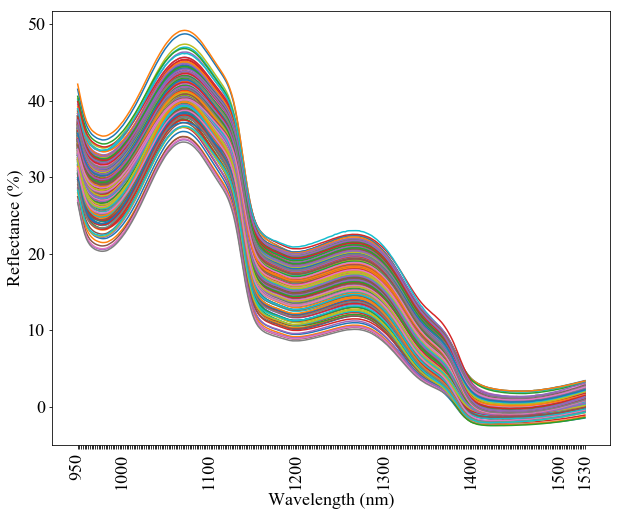

In [13]:
colnames = [str(x) for x in range(950, 1530+1,2)]
df = spectra[colnames].T
df.plot(legend=False, figsize=(10,8))
#plt.title('Spectras')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.savefig('General spectras.png')
plt.xticks(np.arange(len(colnames)), [v if (int(v) % 100 == 0) or k==0 or k==len(colnames)-1 else '' for (k,v) in enumerate(colnames)], rotation=90)
plt.savefig('Spectras - no cleaning.png', bbox_inches='tight')
plt.show()

/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


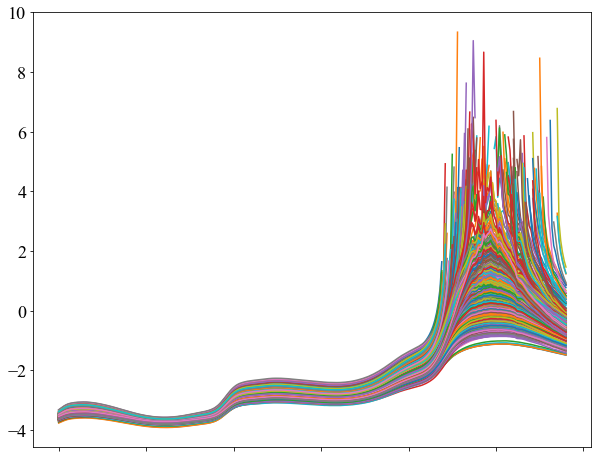

In [14]:
np.log(1/(df+1)).plot(legend=False, figsize=(10,8))
plt.show()

# Target description

In [15]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 293)

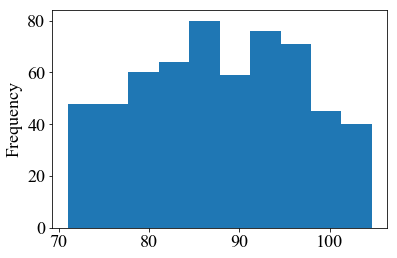

In [16]:
spectra['target'].plot.hist()
plt.savefig('Target histogram - with cleaning.png', bbox_inches='tight')
plt.show()

In [17]:
# The closer to 0, the better
spectra['target'].skew()


-0.031504138888319426

## Target description

In [18]:
spectra[['target']].describe()

,target
count,591.000000
mean,87.928652
std,8.783686
min,71.000000
25%,81.000000
50%,87.333333
75%,94.666667
max,104.666667


# Cleaned dataset saving

In [19]:
spectra.to_csv('../data/cleanedset.csv')